### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



En esta fase, vamos a calcular la facturación neta de cada una de las cuatro tiendas. La facturación neta representa los ingresos reales generados por las ventas. Para este caso vamos asumir que el costo de envío es un gasto que corre por cuenta de las tiendas, por lo tanto, debemos restarlo del precio de cada producto vendido.

Para obtener la facturación neta, sumamos para cada tienda el precio de todos los productos vendidos y restamos el costo total del envío asociado a esas ventas. Es decir, para cada venta se calcula el valor neto como el precio menos el costo de envío, y luego se suman todos estos valores netos para obtener la facturación total neta.

In [3]:
# Calcular facturación neta para cada tienda (precio - costo de envío)
facturacion_tienda1 = (tienda['Precio'] - tienda['Costo de envío']).sum()
facturacion_tienda2 = (tienda2['Precio'] - tienda2['Costo de envío']).sum()
facturacion_tienda3 = (tienda3['Precio'] - tienda3['Costo de envío']).sum()
facturacion_tienda4 = (tienda4['Precio'] - tienda4['Costo de envío']).sum()

# Función para formatear los valores en moneda colombiana
def formato_cop(valor):
    return "${:,.2f}".format(valor)

# Mostrar resultados formateados
print("Facturación Neta Tienda 1:", formato_cop(facturacion_tienda1))
print("Facturación Neta Tienda 2:", formato_cop(facturacion_tienda2))
print("Facturación Neta Tienda 3:", formato_cop(facturacion_tienda3))
print("Facturación Neta Tienda 4:", formato_cop(facturacion_tienda4))


Facturación Neta Tienda 1: $1,089,502,500.00
Facturación Neta Tienda 2: $1,056,858,400.00
Facturación Neta Tienda 3: $1,039,503,000.00
Facturación Neta Tienda 4: $983,058,300.00


Los resultados muestran que la Tienda 1 tiene la facturación neta más alta, con un total de 1.089.502.500, seguida de cerca por la Tienda 2 con 1.056.858.400, luego la Tienda 3 con 1.039.503.000 y finalmente la Tienda 4 con 983.058.300.

Ahora calcularemos la facturación bruta de cada tienda, considerando únicamente el valor total de las ventas sin descontar el costo de envío, ya que en este escenario las tiendas no asumen ese gasto.

In [4]:
# Calcular facturación neta para cada tienda (precio - costo de envío)
facturacion_tienda1 = (tienda['Precio']).sum()
facturacion_tienda2 = (tienda2['Precio']).sum()
facturacion_tienda3 = (tienda3['Precio']).sum()
facturacion_tienda4 = (tienda4['Precio']).sum()

# Función para formatear los valores en moneda colombiana
def formato_cop(valor):
    return "${:,.2f}".format(valor)

# Mostrar resultados formateados
print("Facturación Neta Tienda 1:", formato_cop(facturacion_tienda1))
print("Facturación Neta Tienda 2:", formato_cop(facturacion_tienda2))
print("Facturación Neta Tienda 3:", formato_cop(facturacion_tienda3))
print("Facturación Neta Tienda 4:", formato_cop(facturacion_tienda4))

Facturación Neta Tienda 1: $1,150,880,400.00
Facturación Neta Tienda 2: $1,116,343,500.00
Facturación Neta Tienda 3: $1,098,019,600.00
Facturación Neta Tienda 4: $1,038,375,700.00


Los resultados muestran que la Tienda 1 tiene la facturación bruta más alta, con un total de 1.150.880.400, seguida de cerca por la Tienda 2 con 1.116.343.500, luego la Tienda 3 con 1.098.019.600 y finalmente la Tienda 4 con 1.038.375.700.

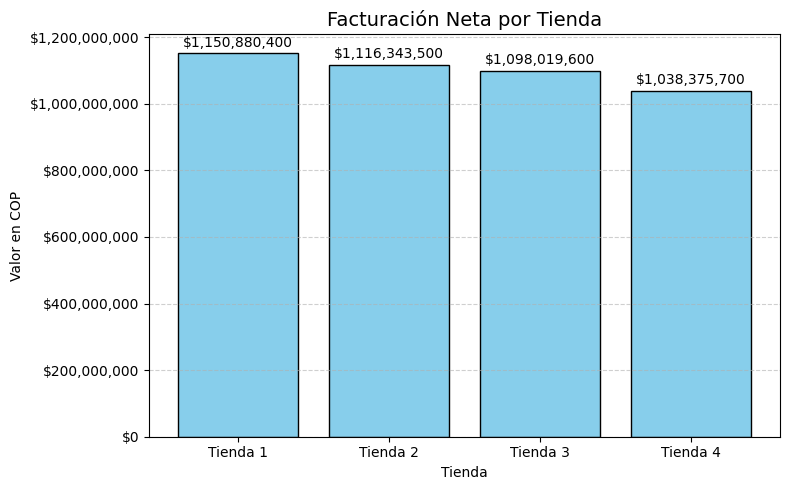

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Datos reales
facturacion_neta = {
    "Tienda 1": 1150880400,
    "Tienda 2": 1116343500,
    "Tienda 3": 1098019600,
    "Tienda 4": 1038375700
}

# Convertir a listas (evita TypeError)
tiendas = list(facturacion_neta.keys())
valores = list(facturacion_neta.values())

plt.figure(figsize=(8,5))
bars = plt.bar(tiendas, valores, color='skyblue', edgecolor='black')
plt.title("Facturación Neta por Tienda", fontsize=14)
plt.ylabel("Valor en COP")
plt.xlabel("Tienda")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Formato moneda en eje Y
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"${x:,.0f}"))

# Anotar cada barra con su valor formateado
for bar, val in zip(bars, valores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(valores)*0.01,
             f"${val:,.0f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# 2. Ventas por categoría

En esta fase vamos a calcular las ventas de cada tienda clasificadas por categoría de producto.

En principio se calcula la cantidad total de productos vendidos por categoría en cada tienda, sumando las unidades vendidas de cada producto dentro de la misma categoría. El objetivo es identificar las líneas con mayor rotación o demanda en volumen, independientemente de su precio.

In [8]:
# Agrupar y contar la cantidad de productos vendidos por categoría en cada tienda
ventas_tienda1 = tienda.groupby('Categoría del Producto')['Producto'].count()
ventas_tienda2 = tienda2.groupby('Categoría del Producto')['Producto'].count()
ventas_tienda3 = tienda3.groupby('Categoría del Producto')['Producto'].count()
ventas_tienda4 = tienda4.groupby('Categoría del Producto')['Producto'].count()

# Crear el DataFrame con las cantidades por categoría y tienda
ventas_por_categoria = pd.DataFrame({
    'Tienda 1': ventas_tienda1,
    'Tienda 2': ventas_tienda2,
    'Tienda 3': ventas_tienda3,
    'Tienda 4': ventas_tienda4
}).fillna(0).astype(int)

# Agregar una fila con el total de productos vendidos por tienda
ventas_por_categoria.loc['Total'] = ventas_por_categoria.sum()

# Mostrar la tabla
ventas_por_categoria

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480
Total,2359,2359,2359,2358


En términos de volumen de ventas, las categorías de Muebles, Electrónicos y Juguetes se posicionan como las más demandadas en todas las tiendas, destacando Muebles como la de mayor rotación general.

Ahora se calculan las ventas totales por categoría en cada tienda considerando el valor monetario generado. Dado que el valor total de cada venta corresponde al precio del producto, para calcular las ventas por categoría, se suman los precios de todos los productos vendidos en cada categoría. El objetivo es identificar cuáles líneas de producto generan mayores ingresos para cada tienda.

In [5]:
# Agrupar y sumar las ventas por categoría en cada tienda
ventas_tienda1 = tienda.groupby('Categoría del Producto')['Precio'].sum()
ventas_tienda2 = tienda2.groupby('Categoría del Producto')['Precio'].sum()
ventas_tienda3 = tienda3.groupby('Categoría del Producto')['Precio'].sum()
ventas_tienda4 = tienda4.groupby('Categoría del Producto')['Precio'].sum()

# Crear el DataFrame con las sumas por categoría y tienda
ventas_por_categoria = pd.DataFrame({
    'Tienda 1': ventas_tienda1,
    'Tienda 2': ventas_tienda2,
    'Tienda 3': ventas_tienda3,
    'Tienda 4': ventas_tienda4
}).fillna(0)

ventas_por_categoria.loc['Total'] = ventas_por_categoria.sum()

# Mostrar el DataFrame con formato de moneda colombiana
ventas_por_categoria.style.format("${:,.0f}")



,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,"$12,698,400","$14,746,900","$15,060,000","$15,074,500"
Deportes y diversión,"$39,290,000","$34,744,500","$35,593,100","$33,350,100"
Electrodomésticos,"$363,685,200","$348,567,800","$329,237,900","$283,260,200"
Electrónicos,"$429,493,500","$410,831,100","$410,775,800","$409,476,100"
Instrumentos musicales,"$91,299,000","$104,990,300","$77,380,900","$75,102,400"
Juguetes,"$17,995,700","$15,945,400","$19,401,100","$20,262,200"
Libros,"$8,784,900","$10,091,200","$9,498,700","$9,321,300"
Muebles,"$187,633,700","$176,426,300","$201,072,100","$192,528,900"
Total,"$1,150,880,400","$1,116,343,500","$1,098,019,600","$1,038,375,700"


Los resultados de las ventas muestran que las categorías que generan la mayor facturación en todas las cuatro tiendas son Electrónicos y Electrodomésticos, seguidas por Muebles e Instrumentos musicales. Estas categorías concentran la mayor parte de las ventas, reflejando una fuerte demanda en productos tecnológicos y para el hogar. La categoría más débil en ventas para todas las tiendas es Libros, con la facturación más baja en comparación con las demás categorías.

# 3. Calificación promedio de la tienda


En esta fase se calculará la calificación promedio de cada tienda. El cálculo se realiza obteniendo el promedio aritmético de todas las calificaciones registradas para cada tienda, lo que permitirá evaluar el nivel general de satisfacción de los compradores.

In [6]:
# Calcular la calificación promedio por tienda
promedio_tienda1 = tienda['Calificación'].mean()
promedio_tienda2 = tienda2['Calificación'].mean()
promedio_tienda3 = tienda3['Calificación'].mean()
promedio_tienda4 = tienda4['Calificación'].mean()

# Crear DataFrame con los promedios
calificaciones_promedio = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificación Promedio': [promedio_tienda1, promedio_tienda2, promedio_tienda3, promedio_tienda4]
})

# Mostrar con dos decimales
calificaciones_promedio['Calificación Promedio'] = calificaciones_promedio['Calificación Promedio'].round(2)
calificaciones_promedio


,Tienda,Calificación Promedio
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


La Tienda 3 obtuvo la mejor calificación promedio (4.05), seguida muy de cerca por la Tienda 2 (4.04) y la Tienda 4 (4.00). La Tienda 1 presenta el promedio más bajo (3.98).

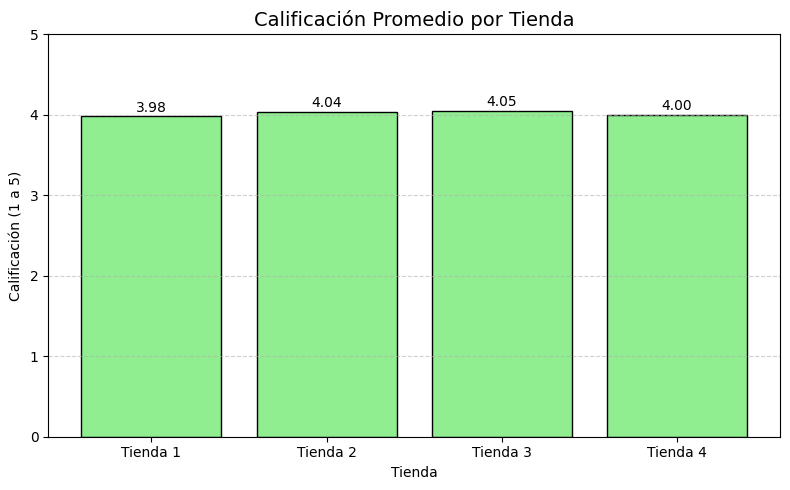

In [22]:
import matplotlib.pyplot as plt

# Datos de calificación promedio
calificaciones = {
    "Tienda 1": 3.98,
    "Tienda 2": 4.04,
    "Tienda 3": 4.05,
    "Tienda 4": 4.00
}

# Convertir a listas
tiendas = list(calificaciones.keys())
valores = list(calificaciones.values())

# Crear gráfica
plt.figure(figsize=(8,5))
bars = plt.bar(tiendas, valores, color='lightgreen', edgecolor='black')
plt.title("Calificación Promedio por Tienda", fontsize=14)
plt.ylabel("Calificación (1 a 5)")
plt.xlabel("Tienda")
plt.ylim(0, 5)  # Escala fija de 1 a 5
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Etiquetas de valor sobre cada barra
for bar, val in zip(bars, valores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f"{val:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

En esta fase se identifican los productos con mayores y menores ventas en cada tienda. Para el cálculo, los datos se agrupan por tienda y nombre del producto, sumando el número de unidades vendidas; posteriormente, se selecciona el producto con el valor máximo y el mínimo en cada tienda

In [15]:
# Cargar datos
tiendas = [pd.read_csv(url) for url in [url1, url2, url3, url4]]

# Función para identificar productos más y menos vendidos
def mas_menos_vendidos(df, nombre_tienda):
    ventas = df.groupby("Producto").size().reset_index(name="Ventas")
    producto_mas = ventas.sort_values("Ventas", ascending=False).head(1)
    producto_menos = ventas.sort_values("Ventas", ascending=True).head(1)

    print(f"\n - {nombre_tienda}")
    print("Más vendido:")
    print(producto_mas)
    print("\nMenos vendido:")
    print(producto_menos)

# Aplicar la función a cada tienda
for i, tienda in enumerate(tiendas, start=1):
    mas_menos_vendidos(tienda, f"Tienda {i}")



 - Tienda 1
Más vendido:
  Producto  Ventas
1  Armario      60

Menos vendido:
                    Producto  Ventas
4  Auriculares con micrófono      33

 - Tienda 2
Más vendido:
                     Producto  Ventas
24  Iniciando en programación      65

Menos vendido:
         Producto  Ventas
26  Juego de mesa      32

 - Tienda 3
Más vendido:
         Producto  Ventas
27  Kit de bancas      57

Menos vendido:
                  Producto  Ventas
9  Bloques de construcción      35

 - Tienda 4
Más vendido:
    Producto  Ventas
10  Cama box      62

Menos vendido:
              Producto  Ventas
22  Guitarra eléctrica      33


# 5. Envío promedio por tienda

En esta fase se estima el valor del envío promedio por tienda, para esto se calcula la media aritmética del costo de envío de cada tienda.

In [18]:
# Calcular promedio de envío por tienda
promedios = {
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Costo de Envío Promedio": [
        tienda1["Costo de envío"].mean(),
        tienda2["Costo de envío"].mean(),
        tienda3["Costo de envío"].mean(),
        tienda4["Costo de envío"].mean()
    ]
}

tabla_promedios = pd.DataFrame(promedios)

print(tabla_promedios)


     Tienda  Costo de Envío Promedio
0  Tienda 1             26018.609580
1  Tienda 2             25216.235693
2  Tienda 3             24805.680373
3  Tienda 4             23459.457167


Los resultados muestran que la Tienda 1 presenta el costo de envío promedio más alto (26.019), mientras que Tienda 4 registra el más bajo (23.459).

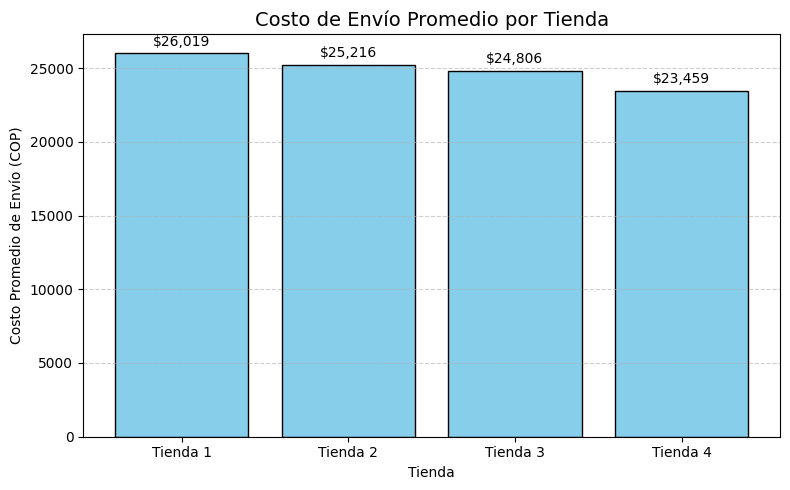

In [23]:
import matplotlib.pyplot as plt

# Datos de costo de envío promedio
envios = {
    "Tienda 1": 26018.609580,
    "Tienda 2": 25216.235693,
    "Tienda 3": 24805.680373,
    "Tienda 4": 23459.457167
}

# Convertir a listas
tiendas = list(envios.keys())
valores = list(envios.values())

# Crear gráfica
plt.figure(figsize=(8,5))
bars = plt.bar(tiendas, valores, color='skyblue', edgecolor='black')
plt.title("Costo de Envío Promedio por Tienda", fontsize=14)
plt.ylabel("Costo Promedio de Envío (COP)")
plt.xlabel("Tienda")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Etiquetas de valor sobre cada barra
for bar, val in zip(bars, valores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 300,
             f"${val:,.0f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# INFORME FINAL – ANÁLISIS DE DESEMPEÑO DE TIENDAS ALURA STORE

El proposito de este análisis es identificar cuál de las cuatro tiendas de la cadena Alura Store presenta el menor rendimiento global y, por lo tanto, debería ser vendida para que el Sr. Juan pueda iniciar un nuevo emprendimiento. Para ello, se evaluaron indicadores clave como facturación total, distribución de ventas por categoría, calificación promedio de los clientes, productos más y menos vendidos, y costo de envío promedio. Los datos se analizaron tanto en términos monetarios como en cantidades vendidas, y se complementaron con visualizaciones para facilitar la interpretación.

### 1. Facturación total

El análisis de facturación muestra que la Tienda 1 lidera en ingresos con 1.150.880.400, seguida por la Tienda 2 con $1.116.343.500 y la Tienda 3 con 1.098.019.600. La Tienda 4 presenta el menor ingreso, con 1.038.375.700, lo que representa una diferencia de 112.504.700 (-9,7%) frente a la líder. Esta brecha evidencia un menor rendimiento comercial sostenido en la Tienda 4.

Asumiendo que el costo de envío es un gasto asumido por las tiendas. Los resultados muestran que la Tienda 1 mantiene el liderazgo con 1.089.502.500, seguida por la Tienda 2 con 1.056.858.400, luego la Tienda 3 con 1.039.503.000 y finalmente la Tienda 4 con 983.058.300, ampliando así la distancia entre la tienda de mayor y menor desempeño.

### 2. Ventas por categoría
En número de unidades, todas las tiendas muestran fortaleza en Muebles (Tienda 3: 499 unidades, Tienda 4: 480 unidades) y Electrónicos (Tienda 3 y Tienda 4: 451 unidades). Sin embargo, la Tienda 4 se ve afectada por su bajo volumen en Electrodomésticos (254 unidades) e Instrumentos musicales (170 unidades), lo que impacta directamente su facturación. En términos monetarios, la Tienda 4 registra 283.260.200 en Electrodomésticos y 75.102.400 en Instrumentos musicales, ambos los más bajos entre todas las tiendas.

### 3. Calificación promedio
Las calificaciones de clientes se mantienen en un rango estrecho, entre 3,98 y 4,05. La Tienda 3 lidera con 4,05, mientras que la Tienda 1 registra el puntaje más bajo con 3,98. La Tienda 4 alcanza 4,00, un valor aceptable pero sin destacar frente a la competencia, lo que indica que no existe una ventaja clara en percepción de servicio o calidad.

### 4. Productos más y menos vendidos
La Tienda 4 tiene como producto más vendido la Cama box con 62 unidades, un desempeño sólido en una categoría puntual. Sin embargo, su producto menos vendido es la Guitarra eléctrica con apenas 33 unidades, lo que refleja una limitada diversificación efectiva en las ventas. En contraste, otras tiendas muestran mayor equilibrio entre productos líderes y de baja rotación.

### 5. Costo de envío promedio
En términos de logística, la Tienda 4 presenta el menor costo de envío promedio, con 23.459, por debajo de la Tienda 3 (24.805), Tienda 2 (25.216) y Tienda 1 (26.018). Si bien esto es una ventaja para el cliente final, no logra compensar las debilidades observadas en ingresos y ventas por categoría.

## Conclusión y recomendación

A partir del análisis de todos los indicadores, la Tienda 4 presenta el desempeño comercial más débil, con la facturación bruta y neta más bajas, un menor aporte en categorías clave como Electrodomésticos e Instrumentos musicales, y una menor diversificación de productos vendidos.

Aunque mantiene un costo de envío competitivo y calificaciones aceptables, la falta de diversificación en ventas y la menor capacidad de generar ingresos la convierten en la opción menos eficiente del portafolio.

En ese orde de ideas, se le recomineda al Sr. Juan considerar vender la Tienda 4 y concentrar sus esfuerzos en las otras tres tiendas, que presentan un mejor balance entre ingresos, diversidad de ventas y potencial de crecimiento sostenido.